Nama: Ngurah Gde Ariwhrihaspati
<br>Email: whrihaspati@gmail.com
<br>Nomor Registrasi DTS FGA 2022 ML Developer: 
1494037162101-947

# **STEP 1: Import Dataset**

In [3]:
! pip install kaggle
! mkdir ~/.kaggle
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/Colab_Notebooks/kaggle.json ~/.kaggle/kaggle.json
! kaggle datasets download -d vijaygiitk/multiclass-weather-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive
 97% 130M/134M [00:01<00:00, 135MB/s]
100% 134M/134M [00:01<00:00, 113MB/s]


In [4]:
! mkdir dataset

In [ ]:
! unzip /content/multiclass-weather-dataset.zip -d dataset

# **STEP 2: Exploratory Data Analysis (EDA)**

In [6]:
import os

base_dir = '/content/dataset/weather-dataset/'
os.mkdir(base_dir)

In [7]:
import shutil

folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
source_folder = '/content/dataset/dataset/'
destination_folder = base_dir

for i in folder:
    # construct full file path
    source = source_folder + i
    destination = destination_folder + i
    shutil.copytree(source, destination)

In [8]:
os.listdir(base_dir)

['cloudy', 'shine', 'foggy', 'sunrise', 'rainy']

In [9]:
import os

a = 0

for folder in os.listdir(base_dir):
  print('{} images are: '.format(folder)+str(len(os.listdir(base_dir+'/'+folder))))
  a += len(os.listdir(base_dir+'/'+folder))

print('Total images are: '+str(a))

cloudy images are: 300
shine images are: 250
foggy images are: 300
sunrise images are: 350
rainy images are: 300
Total images are: 1500


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
  nimages = len(os.listdir(base_dir+i))
  nimgs[i]=nimages

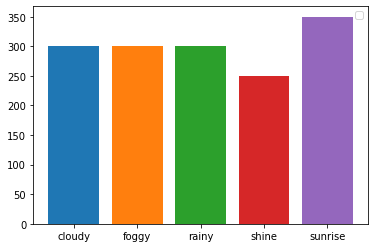

In [11]:
names = list(nimgs.keys())
values = list(nimgs.values())

for i in range(0,5):
  plt.bar(i,values[i],tick_label=names[i])

plt.xticks(range(0,5),names)
plt.legend(loc='best')
plt.show()

# **STEP 3: Data Augmentation**

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [13]:
img_width = 256; img_height = 256
batch_size = 16

In [14]:
train_datagen = ImageDataGenerator(rescale=1/255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 1200 images belonging to 5 classes.
Found 300 images belonging to 5 classes.


In [15]:
!mkdir model

In [16]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

best_model_file = '/content/model/weights-imporovement.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose=1, save_best_only=True)


callbacks_list = [best_model, callbacks]

In [38]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(img_height, img_width, 3)), #input layer
    MaxPooling2D(),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation='relu'), 
    MaxPooling2D(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(164, activation='sigmoid'),
    Dense(5, activation='sigmoid')

])

In [39]:
model.compile(optimizer = 'Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
history = model.fit_generator(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = callbacks_list,
                              )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/15
75/75 [==============================] - ETA: 0s - loss: 1.1217 - accuracy: 0.5308

75/75 [==============================] - 126s 2s/step - loss: 1.1217 - accuracy: 0.5308 - val_loss: 1.1857 - val_accuracy: 0.5767
Epoch 2/15
75/75 [==============================] - ETA: 0s - loss: 0.7912 - accuracy: 0.6925

75/75 [==============================] - 122s 2s/step - loss: 0.7912 - accuracy: 0.6925 - val_loss: 0.7632 - val_accuracy: 0.7100
Epoch 3/15
75/75 [==============================] - ETA: 0s - loss: 0.6782 - accuracy: 0.7392

75/75 [==============================] - 120s 2s/step - loss: 0.6782 - accuracy: 0.7392 - val_loss: 0.7613 - val_accuracy: 0.7233
Epoch 4/15
75/75 [==============================] - ETA: 0s - loss: 0.6407 - accuracy: 0.7442

75/75 [==============================] - 122s 2s/step - loss: 0.6407 - accuracy: 0.7442 - val_loss: 0.7465 - val_accuracy: 0.7300
Epoch 5/15
75/75 [==============================] - ETA: 0s - loss: 0.5904 - accuracy: 0.7742

75/75 [==============================] - 122s 2s/step - loss: 0.5904 - accuracy: 0.7742 - val_loss: 0.7503 - val_accuracy: 0.7367
Epoch 6/15
75/75 [==============================] - ETA: 0s - loss: 0.5399 - accuracy: 0.8025

75/75 [==============================] - 123s 2s/step - loss: 0.5399 - accuracy: 0.8025 - val_loss: 0.7417 - val_accuracy: 0.7400
Epoch 7/15
75/75 [==============================] - ETA: 0s - loss: 0.5317 - accuracy: 0.8033

75/75 [==============================] - 121s 2s/step - loss: 0.5317 - accuracy: 0.8033 - val_loss: 0.6781 - val_accuracy: 0.7667
Epoch 8/15
75/75 [==============================] - ETA: 0s - loss: 0.5230 - accuracy: 0.8000

75/75 [==============================] - 121s 2s/step - loss: 0.5230 - accuracy: 0.8000 - val_loss: 0.5714 - val_accuracy: 0.7833
Epoch 9/15
75/75 [==============================] - ETA: 0s - loss: 0.4905 - accuracy: 0.8150

75/75 [==============================] - 118s 2s/step - loss: 0.4905 - accuracy: 0.8150 - val_loss: 0.7542 - val_accuracy: 0.7267
Epoch 10/15
75/75 [==============================] - ETA: 0s - loss: 0.4259 - accuracy: 0.8450

75/75 [==============================] - 118s 2s/step - loss: 0.4259 - accuracy: 0.8450 - val_loss: 0.5436 - val_accuracy: 0.7967
Epoch 11/15
75/75 [==============================] - ETA: 0s - loss: 0.3956 - accuracy: 0.8525

75/75 [==============================] - 123s 2s/step - loss: 0.3956 - accuracy: 0.8525 - val_loss: 0.6512 - val_accuracy: 0.7733
Epoch 12/15
75/75 [==============================] - ETA: 0s - loss: 0.3981 - accuracy: 0.8592

75/75 [==============================] - 120s 2s/step - loss: 0.3981 - accuracy: 0.8592 - val_loss: 0.5227 - val_accuracy: 0.8200
Epoch 13/15
75/75 [==============================] - ETA: 0s - loss: 0.4161 - accuracy: 0.8475

75/75 [==============================] - 120s 2s/step - loss: 0.4161 - accuracy: 0.8475 - val_loss: 0.5480 - val_accuracy: 0.8100
Epoch 14/15
75/75 [==============================] - ETA: 0s - loss: 0.3632 - accuracy: 0.8633

75/75 [==============================] - 120s 2s/step - loss: 0.3632 - accuracy: 0.8633 - val_loss: 0.5537 - val_accuracy: 0.7933
Epoch 15/15
75/75 [==============================] - ETA: 0s - loss: 0.3388 - accuracy: 0.8750

75/75 [==============================] - 149s 2s/step - loss: 0.3388 - accuracy: 0.8750 - val_loss: 0.6597 - val_accuracy: 0.8033


# **STEP 4: Model Evaluation & Convert TFLite**

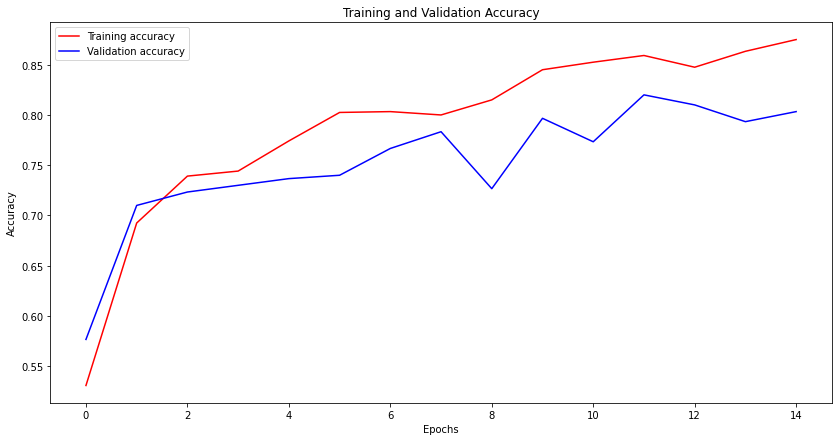

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='best')
plt.show()

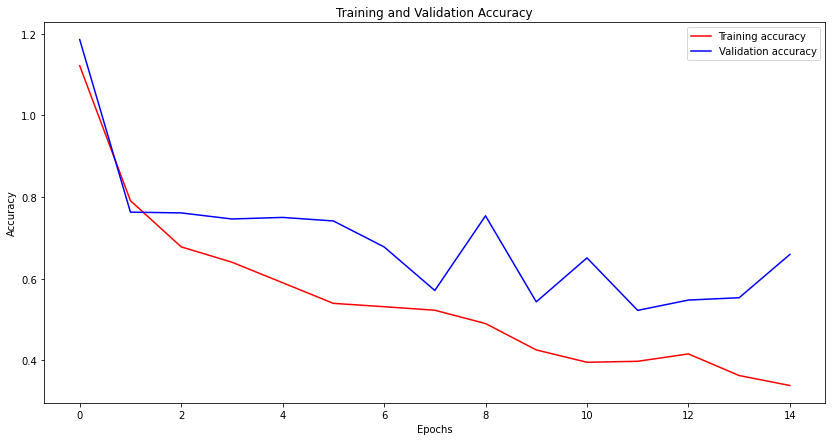

In [42]:
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='best')
plt.show()

In [44]:
import pathlib

export_dir = '/content/model'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

16856316